<a href="https://colab.research.google.com/github/angelesGladin/challenge-data-science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
#insatalacion herramienta seaborn para estilizar gráficas
!pip install seaborn

#1. Análisis de facturación



In [25]:
#función para contar productos por PRECIO y conviertiendolo a Df
def ingresos_precios(df, nombre_tienda):
    suma_tiendas = df['Precio'].sum()
    cantidad = len(df)
    return pd.DataFrame({'Tienda': [nombre_tienda], 'Conteo' : [cantidad], 'Ingreso Total' : [suma_tiendas]})

#aplicar a la funcion por cada tienda
c1 = ingresos_precios(tienda, 'Tienda 1')
c2 = ingresos_precios(tienda2, 'Tienda 2')
c3 = ingresos_precios(tienda3, 'Tienda 3')
c4 = ingresos_precios(tienda4, 'Tienda 4')

#uniendo todo para gráficar
total_suma = pd.concat([c1, c2, c3, c4], ignore_index=True)
pd.options.display.float_format = '{:,.2f}'.format
total_suma

,Tienda,Conteo,Ingreso Total
0,Tienda 1,2359,"1,150,880,400.00"
1,Tienda 2,2359,"1,116,343,500.00"
2,Tienda 3,2359,"1,098,019,600.00"
3,Tienda 4,2358,"1,038,375,700.00"


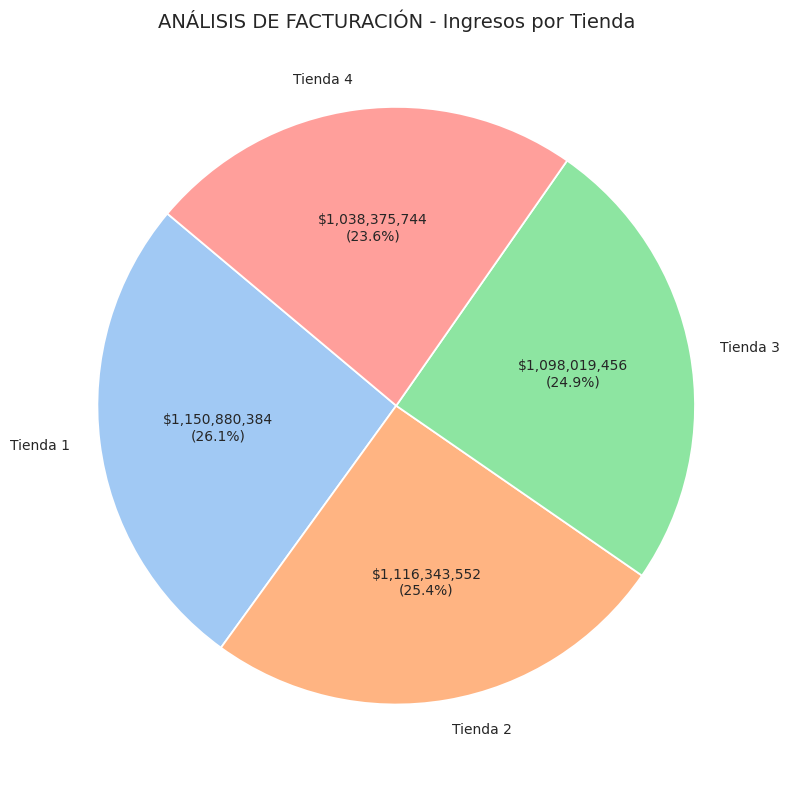

In [91]:
import matplotlib.pyplot as plt

# Datos base
labels = total_suma['Tienda']
sizes = total_suma['Ingreso Total']

# Función para mostrar valores con formato moneda
def formato_monto(pct, all_vals):
    valor_absoluto = int(pct / 100 * sum(all_vals))
    return f'${valor_absoluto:,.0f}\n({pct:.1f}%)'

colors = sns.color_palette('pastel')
# Crear gráfico
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct=lambda pct: formato_monto(pct, sizes), startangle=140, colors=colors, shadow=False, wedgeprops={'edgecolor': 'white', 'linewidth': 1.3})

plt.title('ANÁLISIS DE FACTURACIÓN - Ingresos por Tienda', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [21]:
#función para contar productos por categoria y conviertiendolo a Df
def conteo_categoria(df, nombre_tienda):
    conteo = df.groupby('Categoría del Producto').size().reset_index(name ='Cantidad')
    conteo['Tienda'] = nombre_tienda
    return conteo

#aplicar a la funcion por cada tienda
t1 = conteo_categoria(tienda, 'Tienda 1')
t2 = conteo_categoria(tienda2, 'Tienda 2')
t3 = conteo_categoria(tienda3, 'Tienda 3')
t4 = conteo_categoria(tienda4, 'Tienda 4')

#uniendo todo para gráficar
total = pd.concat([t1, t2, t3, t4], ignore_index=True)
total


,Categoría del Producto,Cantidad,Tienda
0,Artículos para el hogar,171,Tienda 1
1,Deportes y diversión,284,Tienda 1
2,Electrodomésticos,312,Tienda 1
3,Electrónicos,448,Tienda 1
4,Instrumentos musicales,182,Tienda 1
5,Juguetes,324,Tienda 1
6,Libros,173,Tienda 1
7,Muebles,465,Tienda 1
8,Artículos para el hogar,181,Tienda 2
9,Deportes y diversión,275,Tienda 2


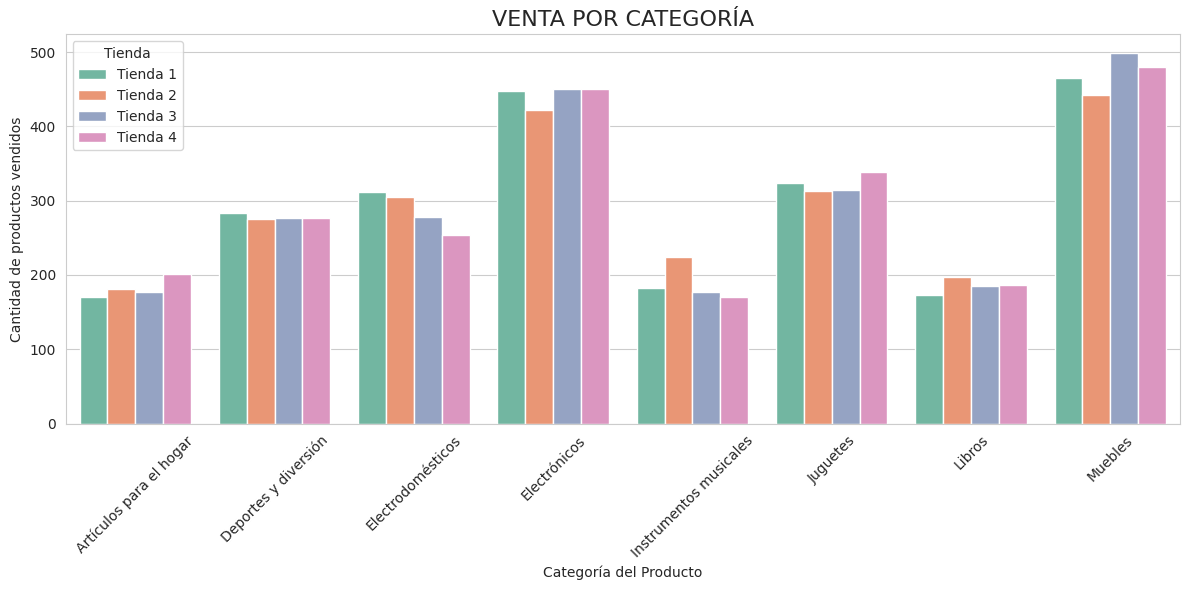

In [87]:
#creación de gráfico con seaborn para estilizar gráfica
import seaborn as sns
import matplotlib.pyplot as plt

#Diseño de la gráfica
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data= total, x='Categoría del Producto', y='Cantidad', hue='Tienda', palette='Set2')

plt.title('VENTA POR CATEGORÍA', fontsize=16)
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad de productos vendidos')
plt.xticks(rotation=45)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [27]:
#función para calcular promedio
def promedio_tienda(df, nombre_tienda):
    cantidad = len(df)
    suma_promedio = df['Calificación'].sum()/cantidad
    return pd.DataFrame({'Tienda': [nombre_tienda], 'Conteo' : [cantidad], 'Promedio' : [suma_promedio]})

#Asignar función a cada tienda
p1 = promedio_tienda(tienda, 'Tienda 1')
p2 = promedio_tienda(tienda2, 'Tienda 2')
p3 = promedio_tienda(tienda3, 'Tienda 3')
p4 = promedio_tienda(tienda4, 'Tienda 4')

#Concatenación
total_promedio = pd.concat([p1, p2, p3, p4], ignore_index=True)
total_promedio

,Tienda,Conteo,Promedio
0,Tienda 1,2359,3.98
1,Tienda 2,2359,4.04
2,Tienda 3,2359,4.05
3,Tienda 4,2358,4.00


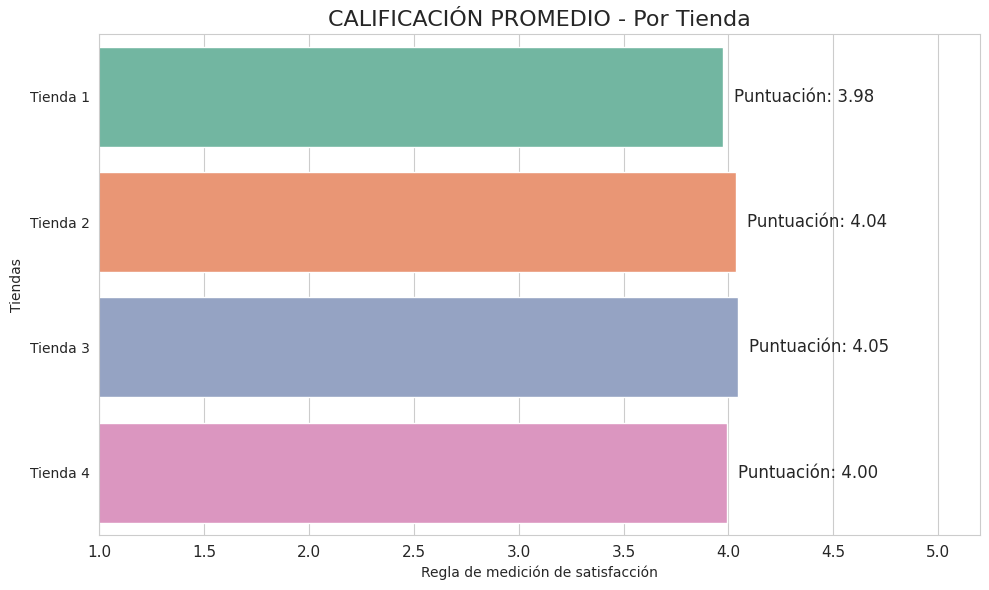

In [93]:
# Creación gráfica del promedio con barras horizontales
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo y tamaño de la figura
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=total_promedio, y='Tienda', x='Promedio', hue='Tienda', legend=False, palette='Set2')

# Título y etiquetas
plt.title('CALIFICACIÓN PROMEDIO - Por Tienda', fontsize=16)
plt.xlabel('Regla de medición de satisfacción')
plt.ylabel('Tiendas')
plt.xticks(ticks=[x * 0.5 for x in range(2, 11)], fontsize=11)
plt.xlim(1, 5.2)

# Mostrar valores al final de cada barra
for i, valor in enumerate(total_promedio['Promedio']):
    ax.text(valor + 0.05, i, f'Puntuación: {valor:,.2f}', va='center', fontsize=12)

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [48]:
#función para contabilizar productos
def productos_tienda(df, nombre_tienda):
    conteo_productos = df['Producto'].value_counts()
    mas_vendido = conteo_productos.idxmax()
    menos_vendido = conteo_productos.idxmin()
    return pd.DataFrame({'Tienda' : [nombre_tienda], 'Producto más vendido' : [mas_vendido], 'Producto menos vendido' : [menos_vendido]})

#aplicar a la funcion por cada tienda
m1 = productos_tienda(tienda, 'Tienda 1')
m2 = productos_tienda(tienda2, 'Tienda 2')
m3 = productos_tienda(tienda3, 'Tienda 3')
m4 = productos_tienda(tienda4, 'Tienda 4')

#Concatenación
productos_mas_menos_vendidos = pd.concat([m1, m2, m3, m4], ignore_index=True)
productos_mas_menos_vendidos

,Tienda,Producto más vendido,Producto menos vendido
0,Tienda 1,Microondas,Auriculares con micrófono
1,Tienda 2,Iniciando en programación,Juego de mesa
2,Tienda 3,Kit de bancas,Bloques de construcción
3,Tienda 4,Cama box,Guitarra eléctrica


# 5. Envío promedio por tienda